# CS394S HW2
## Siyuan Chen 174817 

In [ ]:
import numpy as np
import random

## Question 4
I consider the "Approval Voting" problem
There are candidates and voters (users),each voter can vote for as many candidates as they want; the candidate with the most votes win.

In [21]:
d = [0,1,2,3,4]   # 5 candidates
n = 10 # 10 voters

# Vote Process
# vote = []
vote = [[4], [0, 1, 2, 3, 4], [1, 3], [1, 3], [0, 1, 3], [2, 3, 4], [0, 3], [1, 2, 3, 4], [3], [1, 3, 4]]
for i in range(n):
#     vote_each = sorted (random.sample(d,random.randint(1,5)))
#     vote.append(vote_each)
    print('voter:{} vote for {}'.format(i,vote[i]))

voter:0 vote for [4]
voter:1 vote for [0, 1, 2, 3, 4]
voter:2 vote for [1, 3]
voter:3 vote for [1, 3]
voter:4 vote for [0, 1, 3]
voter:5 vote for [2, 3, 4]
voter:6 vote for [0, 3]
voter:7 vote for [1, 2, 3, 4]
voter:8 vote for [3]
voter:9 vote for [1, 3, 4]


In [20]:
def score (candidate_list, vote_list):
    
    score_list = np.zeros(len(candidate_list))
    
    # count each voter
    for n_v in range(len(vote_list)):
        vote_each = vote_list[n_v]
        
        # count each candidate
        for candidate in candidate_list:
            if candidate in vote_each:
                score_list[candidate] +=1
        
    return score_list

[[4], [0, 1, 2, 3, 4], [1, 3], [1, 3], [0, 1, 3], [2, 3, 4], [0, 3], [1, 2, 3, 4], [3], [1, 3, 4]]


### Sensitivity


In [13]:
def win(score_list):
    return score_list.tolist().index(max(score_list))

def new_data_point(data_point):
    
    operation_data = data_point.copy()
    
    num_votes = len(data_point)
    
    
    options = ['add','del','change']
    if num_votes == len(d):
        options = ['del']
    elif num_votes == 1:
        options = ['add','change']
    
    option = random.choice(options)
    
    diff = list(set(d).difference(set(operation_data)))
    
    
    if option == 'add':     
        add = [random.choice(diff)]
        return operation_data + add
    elif option == 'del':
        
        operation_data = operation_data[0:len(operation_data)-1]
        return operation_data
    
    elif option == 'change':
        operation_data = operation_data[0:len(operation_data)-1]     
        change = [random.choice(diff)]
        
        return operation_data + change



def change_1_datapoint(D , id_x):
    changed_D = D.copy()
    
    changed_D[id_x] = new_data_point(D[id_x])
    
    return changed_D
    

In [14]:
def error (score_list, DP_Algorithm):
    error = max(score_list) - DP_Algorithm(score_list)
    return error

In [15]:
def Global_Sensitivity(score_function,score_list,candidate_list,Dataset, Parallel_Datasets):
    sensitivity = 0
    
    for D in Parallel_Datasets:
        score_list_parallel = score_function(candidate_list,D)
        diff = np.max(abs(score_list_parallel - score_list))
        if diff >= sensitivity:
            sensitivity = diff
    return sensitivity

In [16]:
Parallel_Datasets = []

print(vote)
for id_x in range(n):
    vote_ = change_1_datapoint(vote , id_x)
    Parallel_Datasets.append(vote_)
score_list = score(d, vote)
print(score_list)

[[4], [0, 1, 2, 3, 4], [1, 3], [1, 3], [0, 1, 3], [2, 3, 4], [0, 3], [1, 2, 3, 4], [3], [1, 3, 4]]
[3. 6. 3. 9. 5.]


In [17]:
sensitivity = Global_Sensitivity(score,score_list,d,vote, Parallel_Datasets)

print("=> Global Sensitivity={}".format(sensitivity))

=> Global Sensitivity=1.0


## noisy-max mechanism and the exponential mechanism.

In [18]:
def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)

def report_noisy_max(score_list, sensitivity, epsilon):
    
    # Add noise to each score
    noisy_scores = [laplace_mech(score, sensitivity, epsilon) for score in score_list]

    # Find the index of the maximum score
    max_idx = np.argmax(noisy_scores)
    
    # Return the element corresponding to that index
    return max_idx
    
    
def exponential(score_list, sensitivity , epsilon):
    
    
    # Calculate the probability for each element, based on its score
    probabilities = [np.exp(epsilon * score / (2 * sensitivity)) for score in score_list]
    
    # Normalize the probabilties so they sum to 1
    probabilities = probabilities / np.linalg.norm(probabilities, ord=1)

    # Choose an element from R based on the probabilities
    return np.random.choice(d, 1, p=probabilities)[0]
    


[3. 6. 3. 9. 5.]
epsilon = 0.01,	 exponential mechanism gives Candidate 4
epsilon = 0.1,	 exponential mechanism gives Candidate 3
epsilon = 0.2,	 exponential mechanism gives Candidate 4
epsilon = 0.3,	 exponential mechanism gives Candidate 1
epsilon = 0.5,	 exponential mechanism gives Candidate 3
epsilon = 1,	 exponential mechanism gives Candidate 3
epsilon = 5,	 exponential mechanism gives Candidate 3
epsilon = 10,	 exponential mechanism gives Candidate 3
epsilon = 20,	 exponential mechanism gives Candidate 3
epsilon = 100,	 exponential mechanism gives Candidate 3
epsilon = 0.01,	 noisy_max mechanism gives Candidate 3
epsilon = 0.1,	 noisy_max mechanism gives Candidate 2
epsilon = 0.2,	 noisy_max mechanism gives Candidate 1
epsilon = 0.3,	 noisy_max mechanism gives Candidate 2
epsilon = 0.5,	 noisy_max mechanism gives Candidate 3
epsilon = 1,	 noisy_max mechanism gives Candidate 3
epsilon = 5,	 noisy_max mechanism gives Candidate 3
epsilon = 10,	 noisy_max mechanism gives Candidate 3


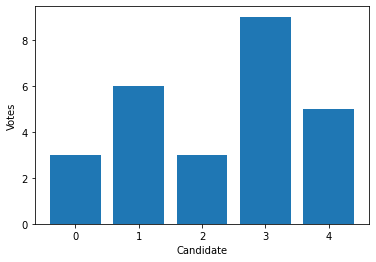

In [19]:
epsilon_list = [0.01,0.1,0.2,0.3,0.5,1,5,10,20,100]


import matplotlib.pyplot as plt
import numpy as np
print(score_list)

plt.bar(d, height=score_list)  # density=False would make counts
plt.ylabel('Votes')
plt.xlabel('Candidate');


for epsilon in epsilon_list:
    expo_maximal_candidate = exponential(score_list, sensitivity=1 , epsilon=epsilon)
    print('epsilon = {},\t exponential mechanism gives Candidate {}'.format(epsilon,int(expo_maximal_candidate)))
   
    
for epsilon in epsilon_list:
    noisy_max_candidate = report_noisy_max(score_list, sensitivity=1 , epsilon=epsilon)
    print('epsilon = {},\t noisy_max mechanism gives Candidate {}'.format(epsilon,int(noisy_max_candidate)))

## Question 5

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_pool = [0,1]

def generate_one_data(d):
    data_point = []
    for i in range(d):
        data_point.append(random.choice(data_pool))
    return data_point

def generate_dataset(n,d):
    dataset = []
    for n_i in range(n):
        dataset.append(generate_one_data(d))
    return dataset

def f(D):
    return np.mean(D)

In [5]:
import math

def laplace_mech(v, sensitivity, epsilon,n):
    return v + np.random.laplace(0, sensitivity / epsilon*n)

def Gaussian_mech(v, sensitivity, delta, epsilon):
    
    sigma = math.sqrt( (32*sensitivity**2*math.log(2/delta)) / (9* epsilon**2) )
    return v + np.random.normal(0,sigma)

=> d = 1


/home/chens0a/.conda/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/chens0a/.conda/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator


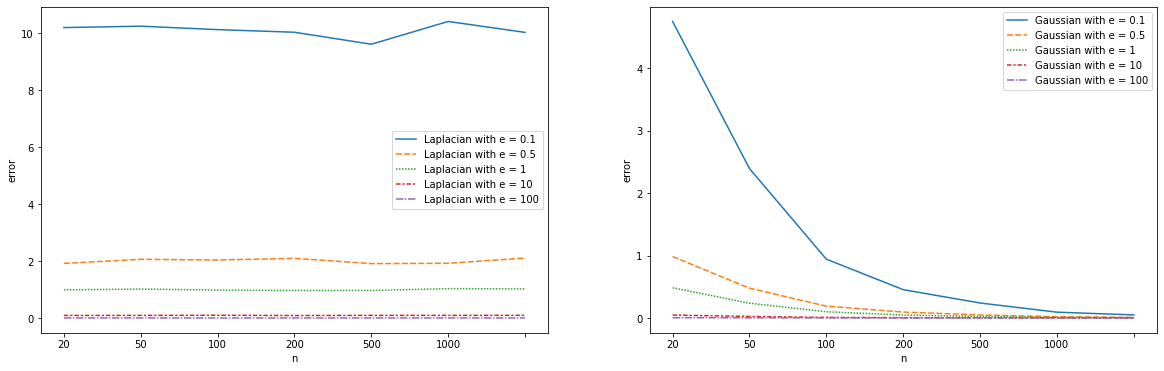

=> d = 3


/home/chens0a/.conda/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/chens0a/.conda/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator


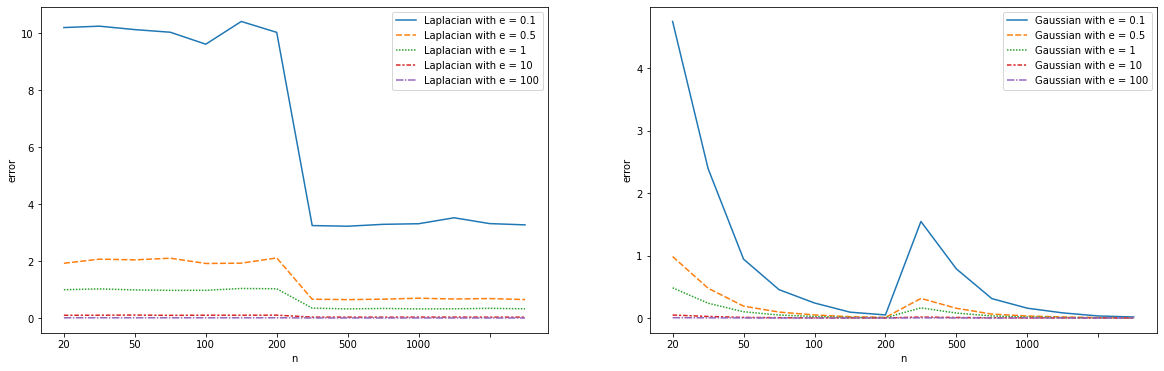

=> d = 5


/home/chens0a/.conda/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/chens0a/.conda/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator


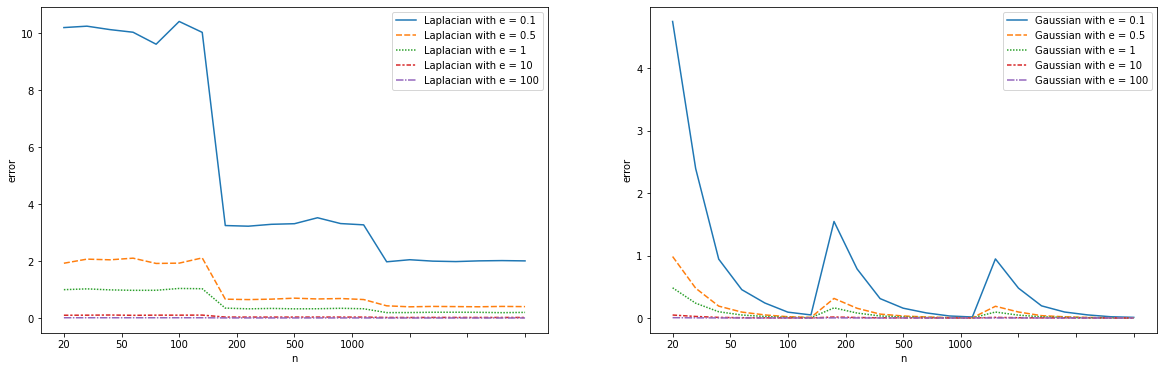

=> d = 10


/home/chens0a/.conda/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/chens0a/.conda/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator


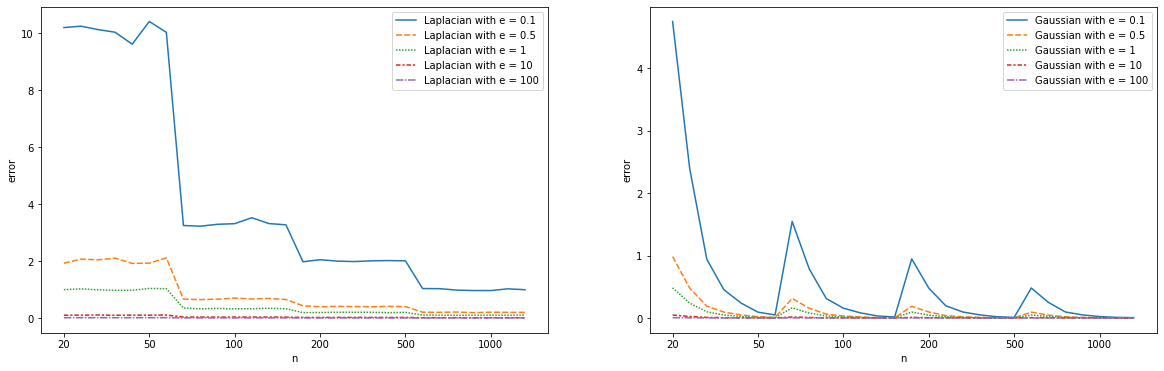

In [16]:
import statistics

n_list = [10,20,50,100,200,500,1000]
epsilon_list = [0.1,0.5,1,10,100]
d_list = [1,3,5,10]

delta = 10e-5


Lap_error_dic = {}
Gau_error_dic = {}

for e in epsilon_list:
    Lap_error_dic["Laplacian with e = {}".format(e)] = []
    Gau_error_dic["Gaussian with e = {}".format(e)] = []
    
    

delta = 10e-5


for d in d_list:
    
    print("=> d = {}".format(d))
    
    for n in n_list:
                
        true_dataset = generate_dataset(n,d)
        true_f =  f(true_dataset)
        
        
        
        for epsilon in epsilon_list:
            
            lap_error_list = []
            gau_error_list = []
            
            for rep in range(1000):
            
            
                laplace_response_f = laplace_mech(true_f, 1, epsilon,n)
                gaussian_response_f = Gaussian_mech(true_f, 1, delta, epsilon)

                lap_error = abs(true_f - laplace_response_f) / (n*d)
                gau_error = abs(true_f - gaussian_response_f) / (n*d)
                lap_error_list.append(lap_error)
                gau_error_list.append(gau_error)

            Lap_error_dic["Laplacian with e = {}".format(epsilon)].append(statistics.mean(lap_error_list))
            Gau_error_dic["Gaussian with e = {}".format(epsilon)].append(statistics.mean(gau_error_list))
            
            
    Lap_df = pd.DataFrame(Lap_error_dic)
    Gau_df = pd.DataFrame(Gau_error_dic)
    
    plt.figure(figsize=(20,6))
    plt.subplot(121)
    ax_1 = sns.lineplot(data=Lap_df)
    ax_1.set_xticklabels(n_list)
    plt.xlabel("n")
    plt.ylabel("error")
    
    plt.subplot(122)
    ax_2 = sns.lineplot(data=Gau_df)
    ax_2.set_xticklabels(n_list)
    plt.xlabel("n")
    plt.ylabel("error")
    
    
    plt.show()
